In [2]:
print("hello world")

hello world


In [1]:
# Download dataset manually before running
# Place it inside 'data/' folder like this:
# data/NEU-DET/train/
# data/NEU-DET/validation/

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
# === Define directories ===
train_dir = "data/NEU-DET/train/images"
val_dir = "data/NEU-DET/validation/images"

In [5]:
import os

print(os.path.exists('data/NEU-DET/train/images'))  # Should return True


False


In [6]:
train_dir = r'E:\DOCUMENT\defect_detection\data\NEU-DET\train\images'
val_dir = r'E:\DOCUMENT\defect_detection\data\NEU-DET\validation\images'


from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical'
)

Found 1440 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [7]:
# === Build CNN model ===
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

c:\Users\Harshit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# === Train model ===
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Harshit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 73s 770ms/step - accuracy: 0.3021 - loss: 1.6576 - val_accuracy: 0.5611 - val_loss: 1.2467
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 337ms/step - accuracy: 0.6986 - loss: 0.8991 - val_accuracy: 0.6389 - val_loss: 0.9787
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 360ms/step - accuracy: 0.8021 - loss: 0.5991 - val_accuracy: 0.7917 - val_loss: 0.6610
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 359ms/step - accuracy: 0.8319 - loss: 0.5301 - val_accuracy: 0.7250 - val_loss: 0.8363
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 357ms/step - accuracy: 0.8257 - loss: 0.5199 - val_accuracy: 0.7389 - val_loss: 0.7529
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 31s 346ms/step - accuracy: 0.8681 - loss: 0.4211 - val_accuracy: 0.7917 - val_loss: 0.5740
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 327ms/step - accuracy: 0.8875 - loss: 0.3370 - val_accuracy: 0.7000 - val_loss: 0.7494
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 314ms/step - accuracy: 0.9056 - loss: 0.3069 - val_accu

In [15]:
# === Save model ===
model.save("defect_detection_model.keras")


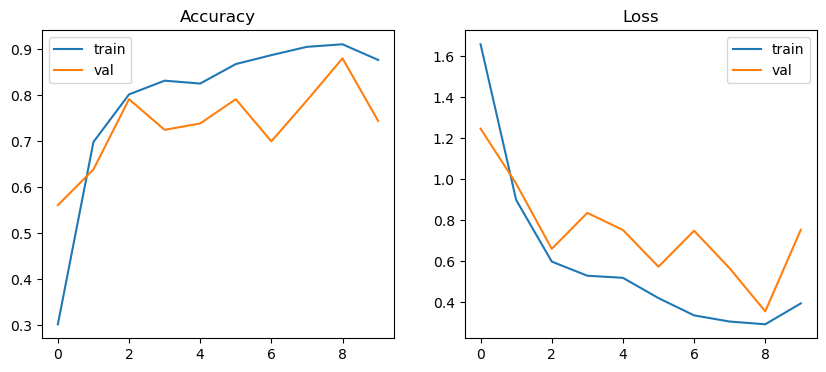

In [10]:
# === Plot accuracy/loss ===
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')  # Auto-adjusts to number of defect types
])


In [13]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [14]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 338ms/step - accuracy: 0.2062 - loss: 1.7608 - val_accuracy: 0.1667 - val_loss: 1.6731
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.3472 - loss: 1.5767 - val_accuracy: 0.3750 - val_loss: 1.4485
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 314ms/step - accuracy: 0.5049 - loss: 1.3048 - val_accuracy: 0.3944 - val_loss: 1.3436
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 29s 318ms/step - accuracy: 0.5792 - loss: 1.1612 - val_accuracy: 0.5472 - val_loss: 1.2542
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 308ms/step - accuracy: 0.7076 - loss: 0.8893 - val_accuracy: 0.7389 - val_loss: 0.8076
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 304ms/step - accuracy: 0.7528 - loss: 0.7718 - val_accuracy: 0.7389 - val_loss: 0.7823
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 308ms/step - accuracy: 0.8069 - loss: 0.6183 - val_accuracy: 0.7833 - val_loss: 0.6756
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 309ms/step - accuracy: 0.8090 - loss: 0.5898 - val_accu

In [17]:
model.save('defect_detector_model.keras')
print("✅ Model saved successfully!")


✅ Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


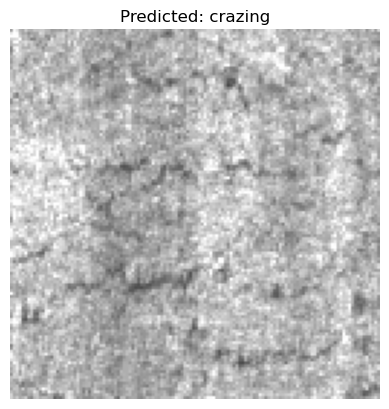

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_defect(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_name = list(train_gen.class_indices.keys())[class_index]

    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# Example usage:
predict_defect(r"E:\DOCUMENT\defect_detection\data\NEU-DET\validation\images\crazing\Crazing_241.jpg")




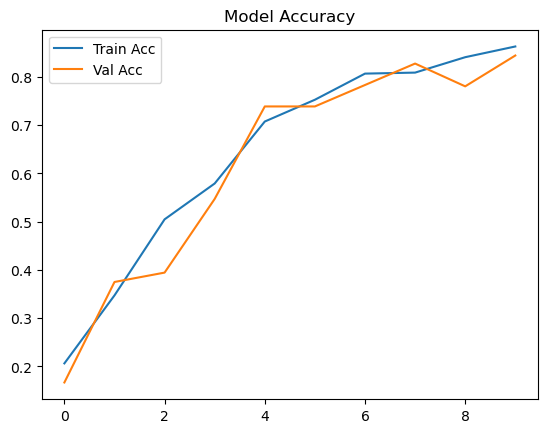

In [19]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Model Accuracy')
plt.show()


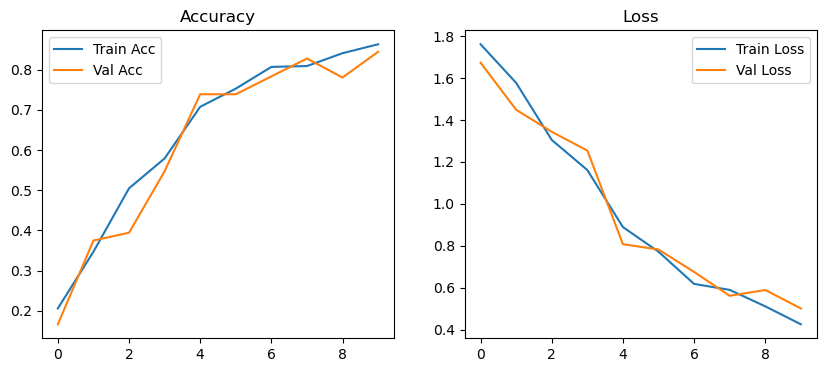

In [23]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


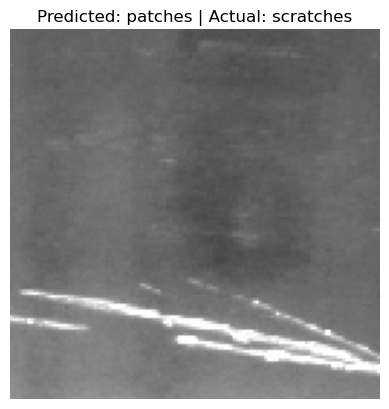

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


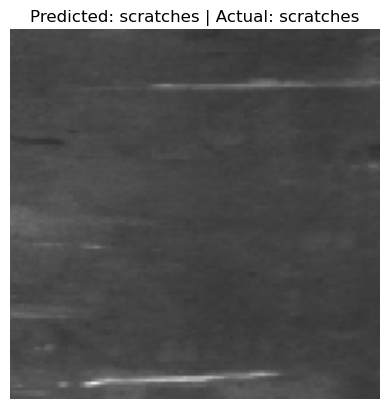

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


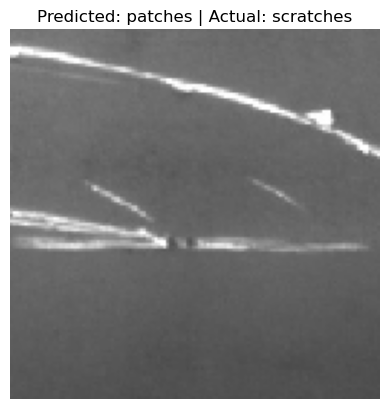

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


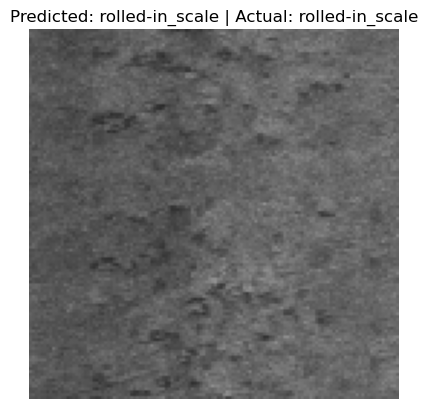

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


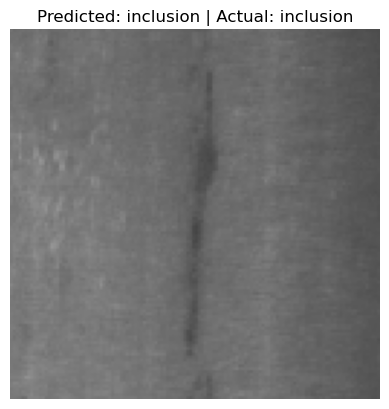

In [25]:
import random

def show_random_predictions(model, data_gen, num_images=5):
    class_names = list(data_gen.class_indices.keys())
    for _ in range(num_images):
        folder = random.choice(class_names)
        folder_path = os.path.join(val_dir, folder)
        img_name = random.choice(os.listdir(folder_path))
        img_path = os.path.join(folder_path, img_name)
        
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        class_name = class_names[class_index]

        plt.imshow(img)
        plt.title(f"Predicted: {class_name} | Actual: {folder}")
        plt.axis('off')
        plt.show()

# Run it
show_random_predictions(model, train_gen)


In [27]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.8444 - loss: 0.4722
Validation Accuracy: 84.44%
